# 1) The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes)

In [22]:
import pandas as pd

df_1 = pd.read_csv('./exam_1.csv').rename(columns={'class' : 'class_x'})
df_2 = pd.read_csv('./exam_2.csv').rename(columns={'class' : 'class_y'})

df = pd.merge(df_1, df_2, how='left')
df.drop(labels=[df.columns[0]], axis=1, inplace=True) # Then we don't need them anymore

display(df_1.head())
display(df_2.head())
display(df.head())

,Unnamed: 0,A,C,E,class_x
0,0,-0.386248,1.536628,1.232589,1
1,1,-2.686649,4.640702,0.823433,1
2,2,0.474124,1.576616,-1.256234,0
3,3,-1.343790,-0.514008,1.520392,2
4,4,-2.187600,0.289041,1.318321,2


,Unnamed: 0,B,D,F,class_y
0,0,-1.432057,1.039420,0.280469,1
1,1,-4.036329,0.526320,-0.419013,1
2,2,0.179770,0.157974,-0.162869,0
3,3,-1.299109,-0.152250,0.045123,2
4,4,-2.089699,-0.494995,-0.661858,2


,A,C,E,class_x,B,D,F,class_y
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2


# 2) Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class

In [23]:
for elem in range(df.shape[0]) :
    if df['class_x'][elem] != df['class_y'][elem] :
        df.drop(index=elem, inplace=True)

df = df.drop(labels=['class_y'], axis=1).rename(columns={'class_x' : 'class'})

In [26]:
df.head()

,A,C,E,class,B,D,F
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858


# 3) Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head 

In [29]:
columns = df.columns
columns = sorted(columns) # order the labels

columns.remove('class'); columns.append('class') # class in last position

df = df[columns] # reordered

print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

The dataframe has 1984 rows and 7 columns


,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


# 4) Find the best classification scheme using three classification methods 
We'll use Decision Trees, Linear Perceptron and K-nearest Neighbors

In [33]:
# We extract the X and y
target = 'class'
random_state = 42

y = df[target]
X = df.drop(target, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

## 4.1) Decision Trees

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Train model
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(X_train, y_train)

# Use model
y_dt_train = dt.predict(X_train)
y_dt_test = dt.predict(X_test)

# Compute accuracy
dt_train_acc = accuracy_score(y_train, y_dt_train) * 100
dt_test_acc = accuracy_score(y_test, y_dt_test) * 100

## 4.2) Linear Perceptron

In [37]:
from sklearn.linear_model import Perceptron

# Train model
lp = Perceptron(random_state=random_state)
lp.fit(X_train, y_train)

# Use model
y_lp_train = lp.predict(X_train)
y_lp_test = lp.predict(X_test)

# Compute accuracy
lp_train_acc = accuracy_score(y_train, y_lp_train) * 100
lp_test_acc = accuracy_score(y_test, y_lp_test) * 100


## 4.3) K-nearest neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Use model
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Compute accuracy
knn_train_acc = accuracy_score(y_train, y_knn_train) * 100
knn_test_acc = accuracy_score(y_test, y_knn_test) * 100

## 4.4) Results

In [45]:
print(f"Decision Tree accuracy: {dt_train_acc:.2f}% on training and {dt_test_acc:.2f}% on testing")
print(f"Linear Perceptron accuracy: {lp_train_acc:.2f}% on training and {lp_test_acc:.2f}% on testing")
print(f"K-nearest neighbours accuracy: {knn_train_acc:.2f}% on training and {knn_test_acc:.2f}% on testing")

Decision Tree accuracy: 100.00% on training and 81.85% on testing
Linear Perceptron accuracy: 74.13% on training and 74.80% on testing
K-nearest neighbours accuracy: 90.32% on training and 88.10% on testing


We can observe that 'Linear Perceptron' is way worse than the others, the 'Decision Tree' is overfitting (working too much better in train set than in test set) while the best seems to be 'K-nearest neighbours' with the highest accuracy on test set.

# 5) For each classification method find the best parameter setting with cross validation on the training set 

In [58]:
# Labels
model_names = ['dt', 'lp', 'knn']

# Models
models = {
    'dt' : {
        'name' : 'Decision Tree',
        'classifier' : DecisionTreeClassifier(),
        'param' : [{
            'random_state' : [random_state],
            'max_depth' : list(range(1, dt.get_depth() + 1))
        }]
    },
    'lp' : {
        'name' : 'Linear Perceptron',
        'classifier' : Perceptron(),
        'param' : [{
            'random_state' : [random_state],
            'early_stopping': [True,False]
        }]
    },
    'knn' : {
        'name' : 'K-Nearest Neighbors',
        'classifier' : KNeighborsClassifier(),
        'param' : [{
            'n_neighbors' : list(range(1,11))
        }]
    }
}

In [77]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

best_results = {}
best_params = {}
clfs = []
cv=5

for model in model_names :
    print(f"{models[model]['name']}: ")

    # Define inizialize the Cross Validation
    clf = GridSearchCV(models[model]['classifier'], 
                       models[model]['param'],
                       cv=cv, 
                       scoring='accuracy')
    
    # Train the Cross Validation
    clf.fit(X_train, y_train)   
    clfs.append(clf)

    # Test the Cross Validation
    y_true, y_pred = y_test, clf.predict(X_test)

    # Report
    cr = classification_report(y_true,
                               y_pred, 
                               output_dict=True,
                               zero_division=1)

    # Register the best
    best_params[model] = clf.best_params_
    best_results[model] = cr['accuracy'] #clf.best_score_

    # Display
    print(f"{best_results[model]}")
    print(f"{best_params[model]}")
    print('#'*50)

Decision Tree: 
0.8245967741935484
{'max_depth': 7, 'random_state': 42}
##################################################
Linear Perceptron: 
0.7479838709677419
{'early_stopping': False, 'random_state': 42}
##################################################
K-Nearest Neighbors: 
0.8629032258064516
{'n_neighbors': 9}
##################################################


# 6) For each classification method compute the accuracy and the confusion matrix on the test set

In [88]:
from sklearn.metrics import confusion_matrix

accuracy_values = {}
cm_values = {}

# We use the best parameters
for m in model_names :
    # Instantiate the classifier with the best parameters
    model = models[m]['classifier'].set_params(**best_params[m])

    # Use the model
    model.fit(X_test, y_test)
    y_test_model = model.predict(X_test)

    # We collect its accuracy and the confusion matrix
    accuracy_values[m] = accuracy_score(y_test, y_test_model)*100
    cm_values[m] = confusion_matrix(y_test, y_test_model)

In [89]:
# Display accuracy
for m in model_names :
    print(f"The {m} : {accuracy_values[m]:.2f}") 

The dt : 95.77
The lp : 78.02
The knn : 87.30


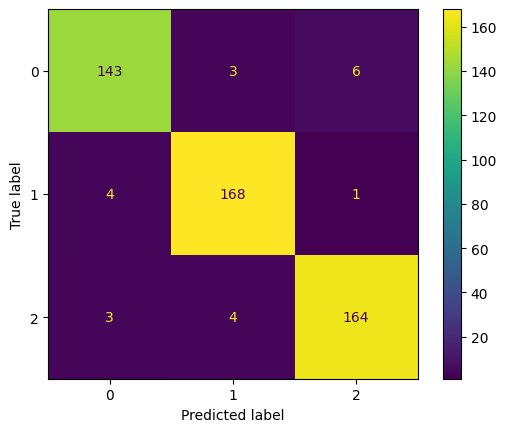

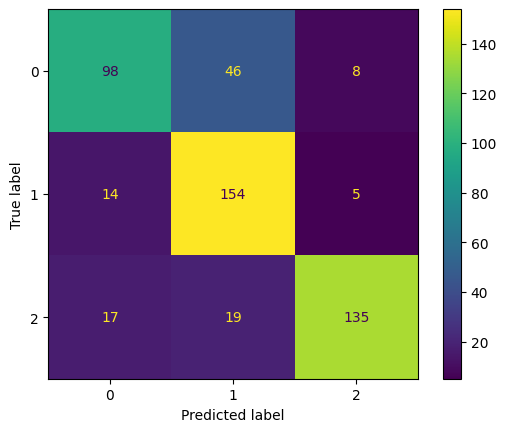

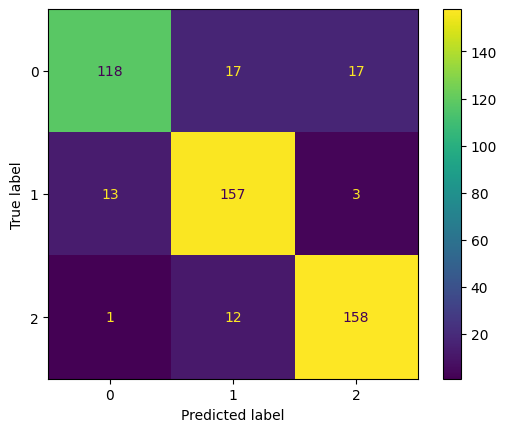

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
for m in model_names :
    ConfusionMatrixDisplay(cm_values[m]).plot()

# 7) Produce a plot of the accuracies given by the methods attempted  

In [98]:
accuracy_values.values()

dict_values([95.76612903225806, 78.0241935483871, 87.29838709677419])

<BarContainer object of 3 artists>

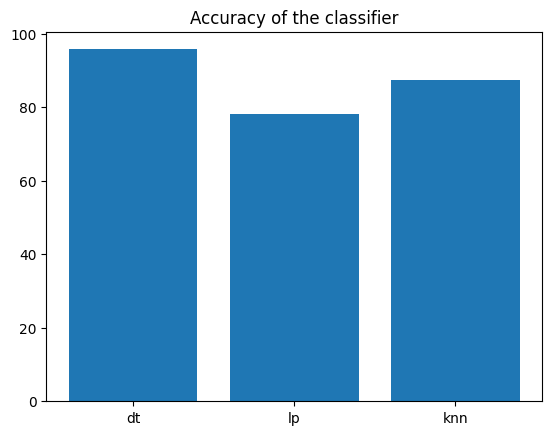

In [99]:
from matplotlib import pyplot as plt

plt.title('Accuracy of the classifier')
plt.bar(model_names, accuracy_values.values())